In [73]:
import sys
sys.path.insert(0, 'C:/Users/guzma/OneDrive/Documents/TEC/DTU/02450/Exercises/toolbox/02450Toolbox_Python/Tools')
from toolbox_02450 import rlr_validate, train_neural_net, draw_neural_net, visualize_decision_boundary


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline

## Data Cleansing

Data can be found in https://archive.ics.uci.edu/ml/datasets/heart+disease. The data taht will be used in this proyect requires we change the encoding of our pandas function so that it may read the characters correctly. Since the data doesn't include the header on the file we must set them ourselves utilizng the heart-disease.names file to guide us in their exact name and position, as well as see what we may expect from the variables in the file.

In [2]:
cleveland = pd.read_csv('processed.cleveland.csv', encoding="ISO-8859-1", header=None)
cleveland.set_axis(['age','sex','cp','testbps','chol','fbs', 'restecg','thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'], inplace=True, axis=1)
cleveland.head()

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
cleveland.shape

(303, 14)

We find that the columns **thal** and **ca** both have the datatype object as they posses the **?** character amongs their values, so we have to replace this with a nan value and then delete the columns, as we find there are only 6 columns. We cannot change the values as this may affect the model later on even if it's just a few samples.

In [4]:
cleveland = cleveland.replace('?', np.nan)
cleveland.thal = cleveland.thal.astype('category')
cleveland.ca = cleveland.ca.astype(np.float64)
# cleveland.cp = cleveland.cp.astype('category')
# cleveland.fbs = cleveland.fbs.astype(bool)
# cleveland.sex = cleveland.sex.astype(bool)
# cleveland.exang = cleveland.exang.astype(bool)
cleveland.restecg = cleveland.restecg.astype(int)
cleveland.age = cleveland.age.astype(int) 
cleveland.thalach = cleveland.thalach.astype(int)
cleveland.slope = cleveland.slope.astype(int)

In [5]:
cleveland.isna().sum()

age        0
sex        0
cp         0
testbps    0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         4
thal       2
num        0
dtype: int64

In [6]:
cleveland.dtypes

age           int32
sex         float64
cp          float64
testbps     float64
chol        float64
fbs         float64
restecg       int32
thalach       int32
exang       float64
oldpeak     float64
slope         int32
ca          float64
thal       category
num           int64
dtype: object

In [7]:
(6/303)*100

1.9801980198019802

In [8]:
cleveland.dropna(inplace=True)

In [9]:
cleveland.isna().sum()

age        0
sex        0
cp         0
testbps    0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
num        0
dtype: int64

## EDA

Now that our data has been cleaned correctly we can start the exploratory data analysis. We will first begin with a correlation matrix to identify how each variable affect one-another. We will do this utilizing the corr function from the pandas library and the heatmap visualization function from the seaborn library.

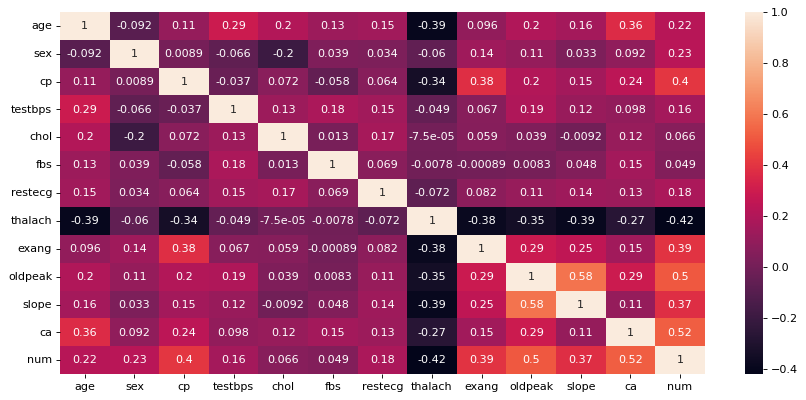

In [10]:
plt.figure(figsize=(13, 6), dpi=80)
sns.heatmap(cleveland.corr(), annot=True)
plt.show()

Now that we see all the correlation between the variables we can begin by searching if there are any outliers in the data that may affect the models we are looking to train.

c:\Users\guzma\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\guzma\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.8 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\Users\guzma\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

[Text(0.5, 0, '')]

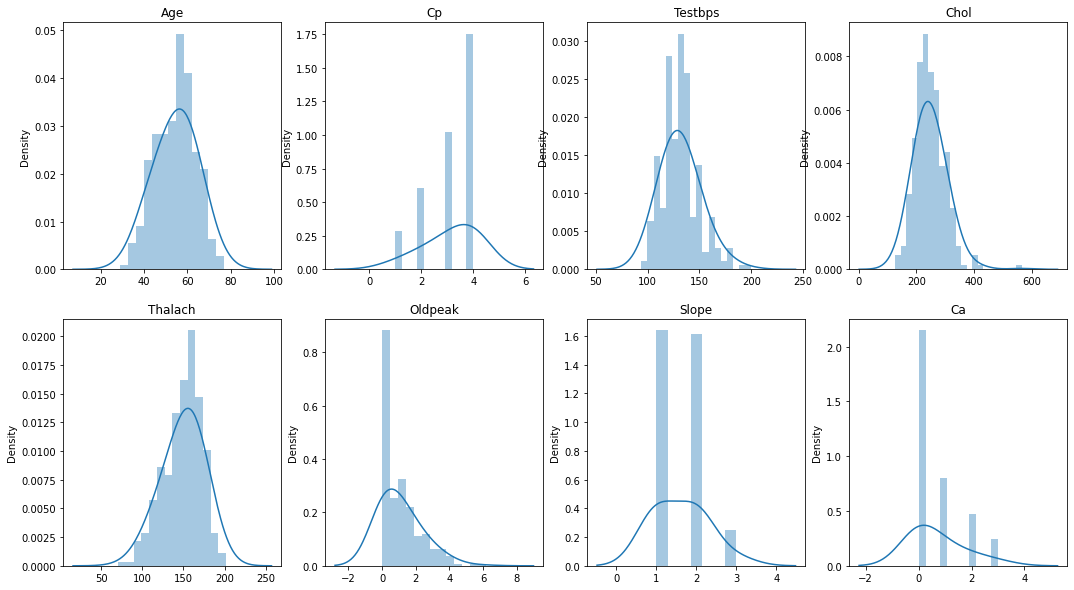

In [11]:
# from seaborn_qqplot import pplot
figure, ax = plt.subplots(2,4,figsize=(18,10))
sns.distplot(x =cleveland.age ,ax=ax[0,0], kde=True, kde_kws={'bw':0.8})
ax[0,0].set_title('Age')
ax[0,0].set(xlabel=None)
sns.distplot(x=cleveland.cp, ax=ax[0,1], kde=True, kde_kws={'bw':0.8})
ax[0,1].set_title('Cp')
ax[0,1].set(xlabel=None)
sns.distplot(x=cleveland.testbps, ax=ax[0,2], kde=True, kde_kws={'bw':0.8})
ax[0,2].set_title('Testbps')
ax[0,2].set(xlabel=None)
sns.distplot(x=cleveland.chol, ax=ax[0,3], kde=True, kde_kws={'bw':0.8})
ax[0,3].set_title('Chol')
ax[0,3].set(xlabel=None)
sns.distplot(x=cleveland.thalach, ax=ax[1,0], kde=True, kde_kws={'bw':0.8})
ax[1,0].set_title('Thalach')
ax[1,0].set(xlabel=None)
sns.distplot(x=cleveland.oldpeak, ax=ax[1,1], kde=True, kde_kws={'bw':0.8})
ax[1,1].set_title('Oldpeak')
ax[1,1].set(xlabel=None)
sns.distplot(x=cleveland.slope, ax=ax[1,2], kde=True, kde_kws={'bw':0.8})
ax[1,2].set_title('Slope')
ax[1,2].set(xlabel=None)
sns.distplot(x=cleveland.ca, ax=ax[1,3], kde=True, kde_kws={'bw':0.8})
ax[1,3].set_title('Ca')
ax[1,3].set(xlabel=None)

[Text(0, 0.5, '')]

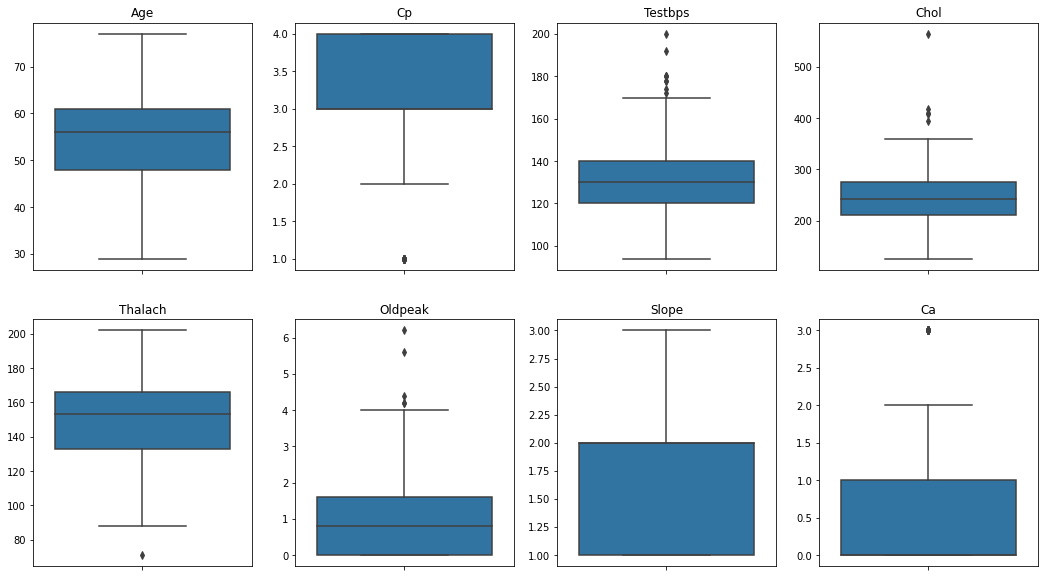

In [12]:
figure, ax = plt.subplots(2,4,figsize=(18,10))
sns.boxplot(y=cleveland.age, ax=ax[0,0])
ax[0,0].set_title('Age')
ax[0,0].set(ylabel=None)
sns.boxplot(y=cleveland.cp, ax=ax[0,1])
ax[0,1].set_title('Cp')
ax[0,1].set(ylabel=None)
sns.boxplot(y=cleveland.testbps, ax=ax[0,2])
ax[0,2].set_title('Testbps')
ax[0,2].set(ylabel=None)
sns.boxplot(y=cleveland.chol, ax=ax[0,3])
ax[0,3].set_title('Chol')
ax[0,3].set(ylabel=None)
sns.boxplot(y=cleveland.thalach, ax=ax[1,0])
ax[1,0].set_title('Thalach')
ax[1,0].set(ylabel=None)
sns.boxplot(y=cleveland.oldpeak, ax=ax[1,1])
ax[1,1].set_title('Oldpeak')
ax[1,1].set(ylabel=None)
sns.boxplot(y=cleveland.slope, ax=ax[1,2])
ax[1,2].set_title('Slope')
ax[1,2].set(ylabel=None)
sns.boxplot(y=cleveland.ca, ax=ax[1,3])
ax[1,3].set_title('Ca')
ax[1,3].set(ylabel=None)

The variables that were not included in this graph are variables that contain boolean values, as such there is no need to plot this variables to check if there are any outliers, for we can easily find those with the unique function from the pandas library.

## PCA

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

We need to change the values of num from a categorical variable to a boolean value that represents wheter the patient presents heart diseas of not.

In [14]:
cleveland.dtypes

age           int32
sex         float64
cp          float64
testbps     float64
chol        float64
fbs         float64
restecg       int32
thalach       int32
exang       float64
oldpeak     float64
slope         int32
ca          float64
thal       category
num           int64
dtype: object

In [15]:
# bol_df = cleveland.iloc[:,[1,5,8]]
X = cleveland.iloc[:,[0,2,3,4,6,7,9,10,11,12]]
# X = cleveland.iloc[:,0:13]
y = cleveland.iloc[:,13]
std = StandardScaler()
transformed = StandardScaler().fit_transform(X)


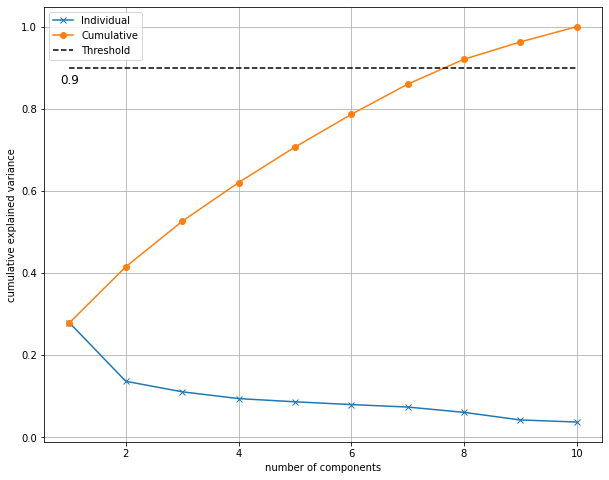

In [16]:
thres = 0.9
plt.figure(figsize=(10,8))
pca = PCA().fit(transformed)
plt.grid(visible=True)
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 'x-')
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.plot([1,len(pca.explained_variance_ratio_)],[thres, thres],'k--')
plt.text(1, thres-0.04, f"{thres}", ha="center", fontsize=12)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.legend(['Individual','Cumulative','Threshold'])
plt.show()

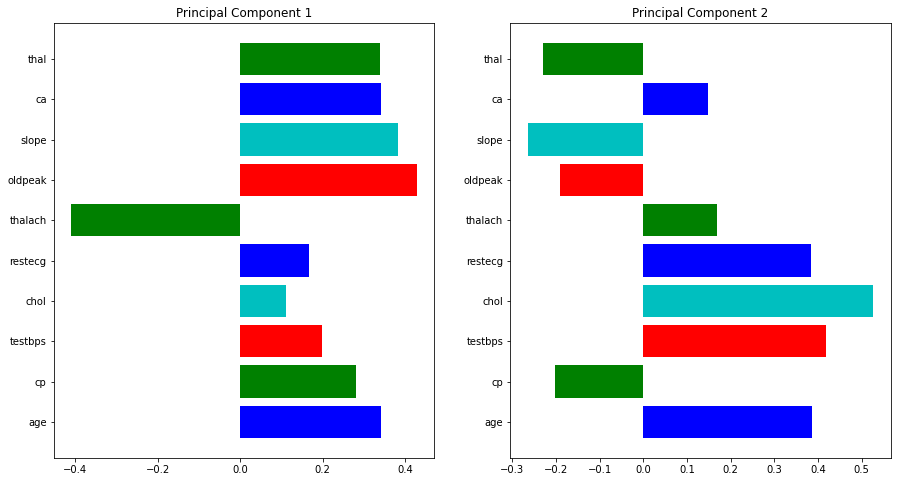

In [17]:
feature_weights = pca.components_
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 8))
ax1.barh(X.columns,feature_weights[0],color=['b','g','r','c'])
ax2.barh(X.columns,feature_weights[1],color=['b','g','r','c'])
ax1.set_title('Principal Component 1')
ax2.set_title('Principal Component 2')
# ax1.xlabel()
plt.show()

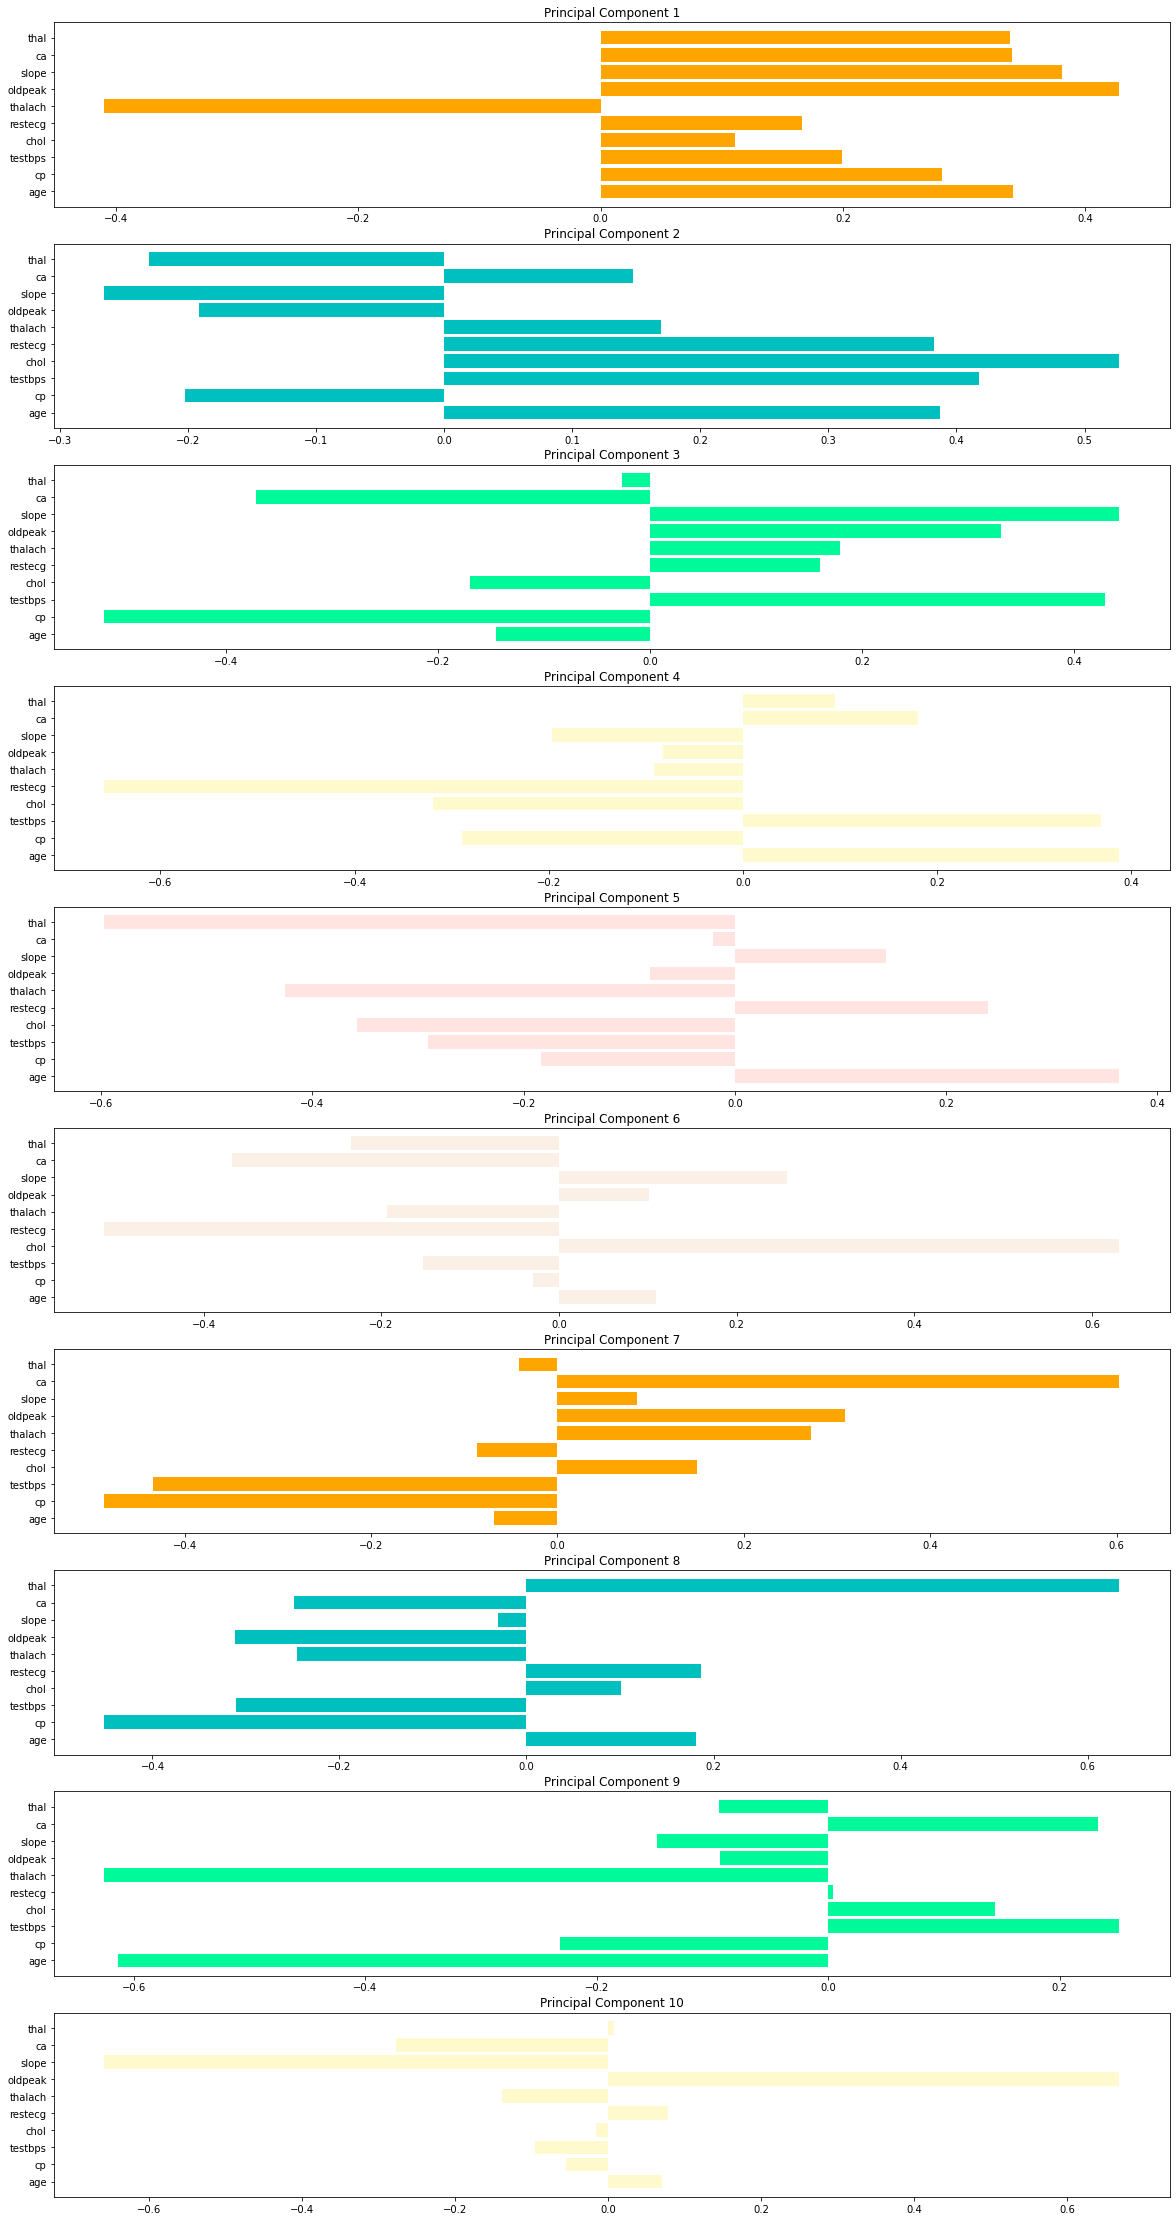

In [18]:
import seaborn as sns
feature_weights = pca.components_
# plt.figure(figsize=(13,1))
colors = ['orange', 'c', 'mediumspringgreen', 'lemonchiffon','mistyrose','linen','orange', 'c', 'mediumspringgreen', 'lemonchiffon','mistyrose','linen','orange']
fig, ax = plt.subplots(10,1, figsize=(20,40))
for i in range(len(feature_weights)):
    ax[i].barh(X.columns, feature_weights[i], color=colors[i])
    ax[i].set_title(f'Principal Component {i+1}')
# ax[1].barh(X.columns, feature_weights[1], color=colors[1])
# ax[1].set_title(f'Principal Component {2}')
# ax[2].barh(X.columns, feature_weights[2], color=colors[2])
# ax[2].set_title(f'Principal Component {3}')
    
# plt.barh(X.columns,feature_weights[0],color=['orange'], label='Principal Component 1')
# plt.barh(X.columns,feature_weights[1],color=['c'], label='Principal Component 2')
# plt.barh(X.columns,feature_weights[2],color=['mediumspringgreen'], label='Principal Component 3')
# plt.legend()
# ax1.xlabel()
plt.show()

In [19]:
len(X.columns)

10

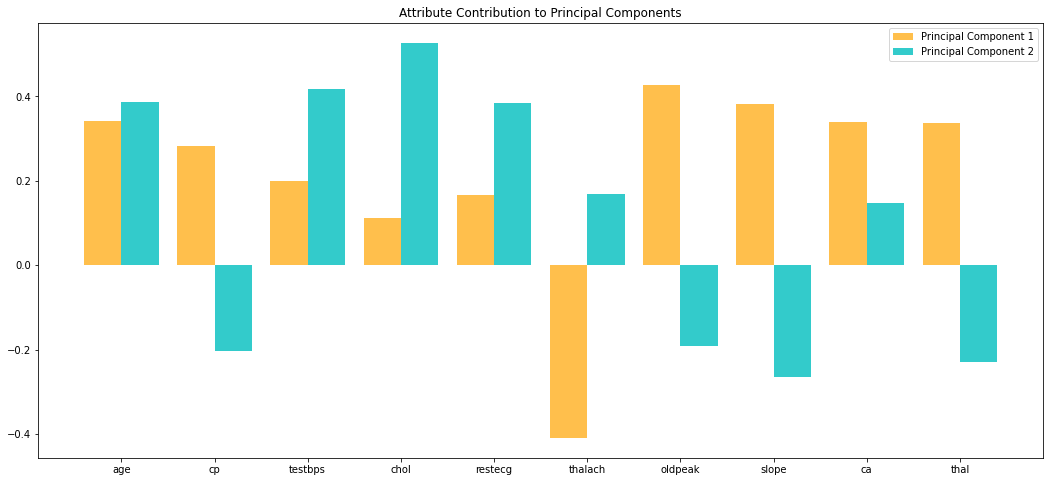

In [20]:
import seaborn as sns
feature_weights = pca.components_
plt.figure(figsize=(18,8))
# fig, ax = plt.subplots(figsize=(15,8))
X_axis = np.arange(len(X.columns))
plt.bar(X_axis - 0.2,feature_weights[0],0.4,color='orange', label='Principal Component 1', alpha=0.7)
plt.bar(X_axis + 0.2,feature_weights[1],0.4,color='c', label='Principal Component 2', alpha=0.8)
plt.xticks(X_axis, X.columns)
# sns.barplot(y=X.columns,x=feature_weights[2],color='mediumspringgreen', label='Principal Component 3',alpha=0.8)
plt.legend()
plt.title('Attribute Contribution to Principal Components')
# ax1.xlabel()
plt.show()

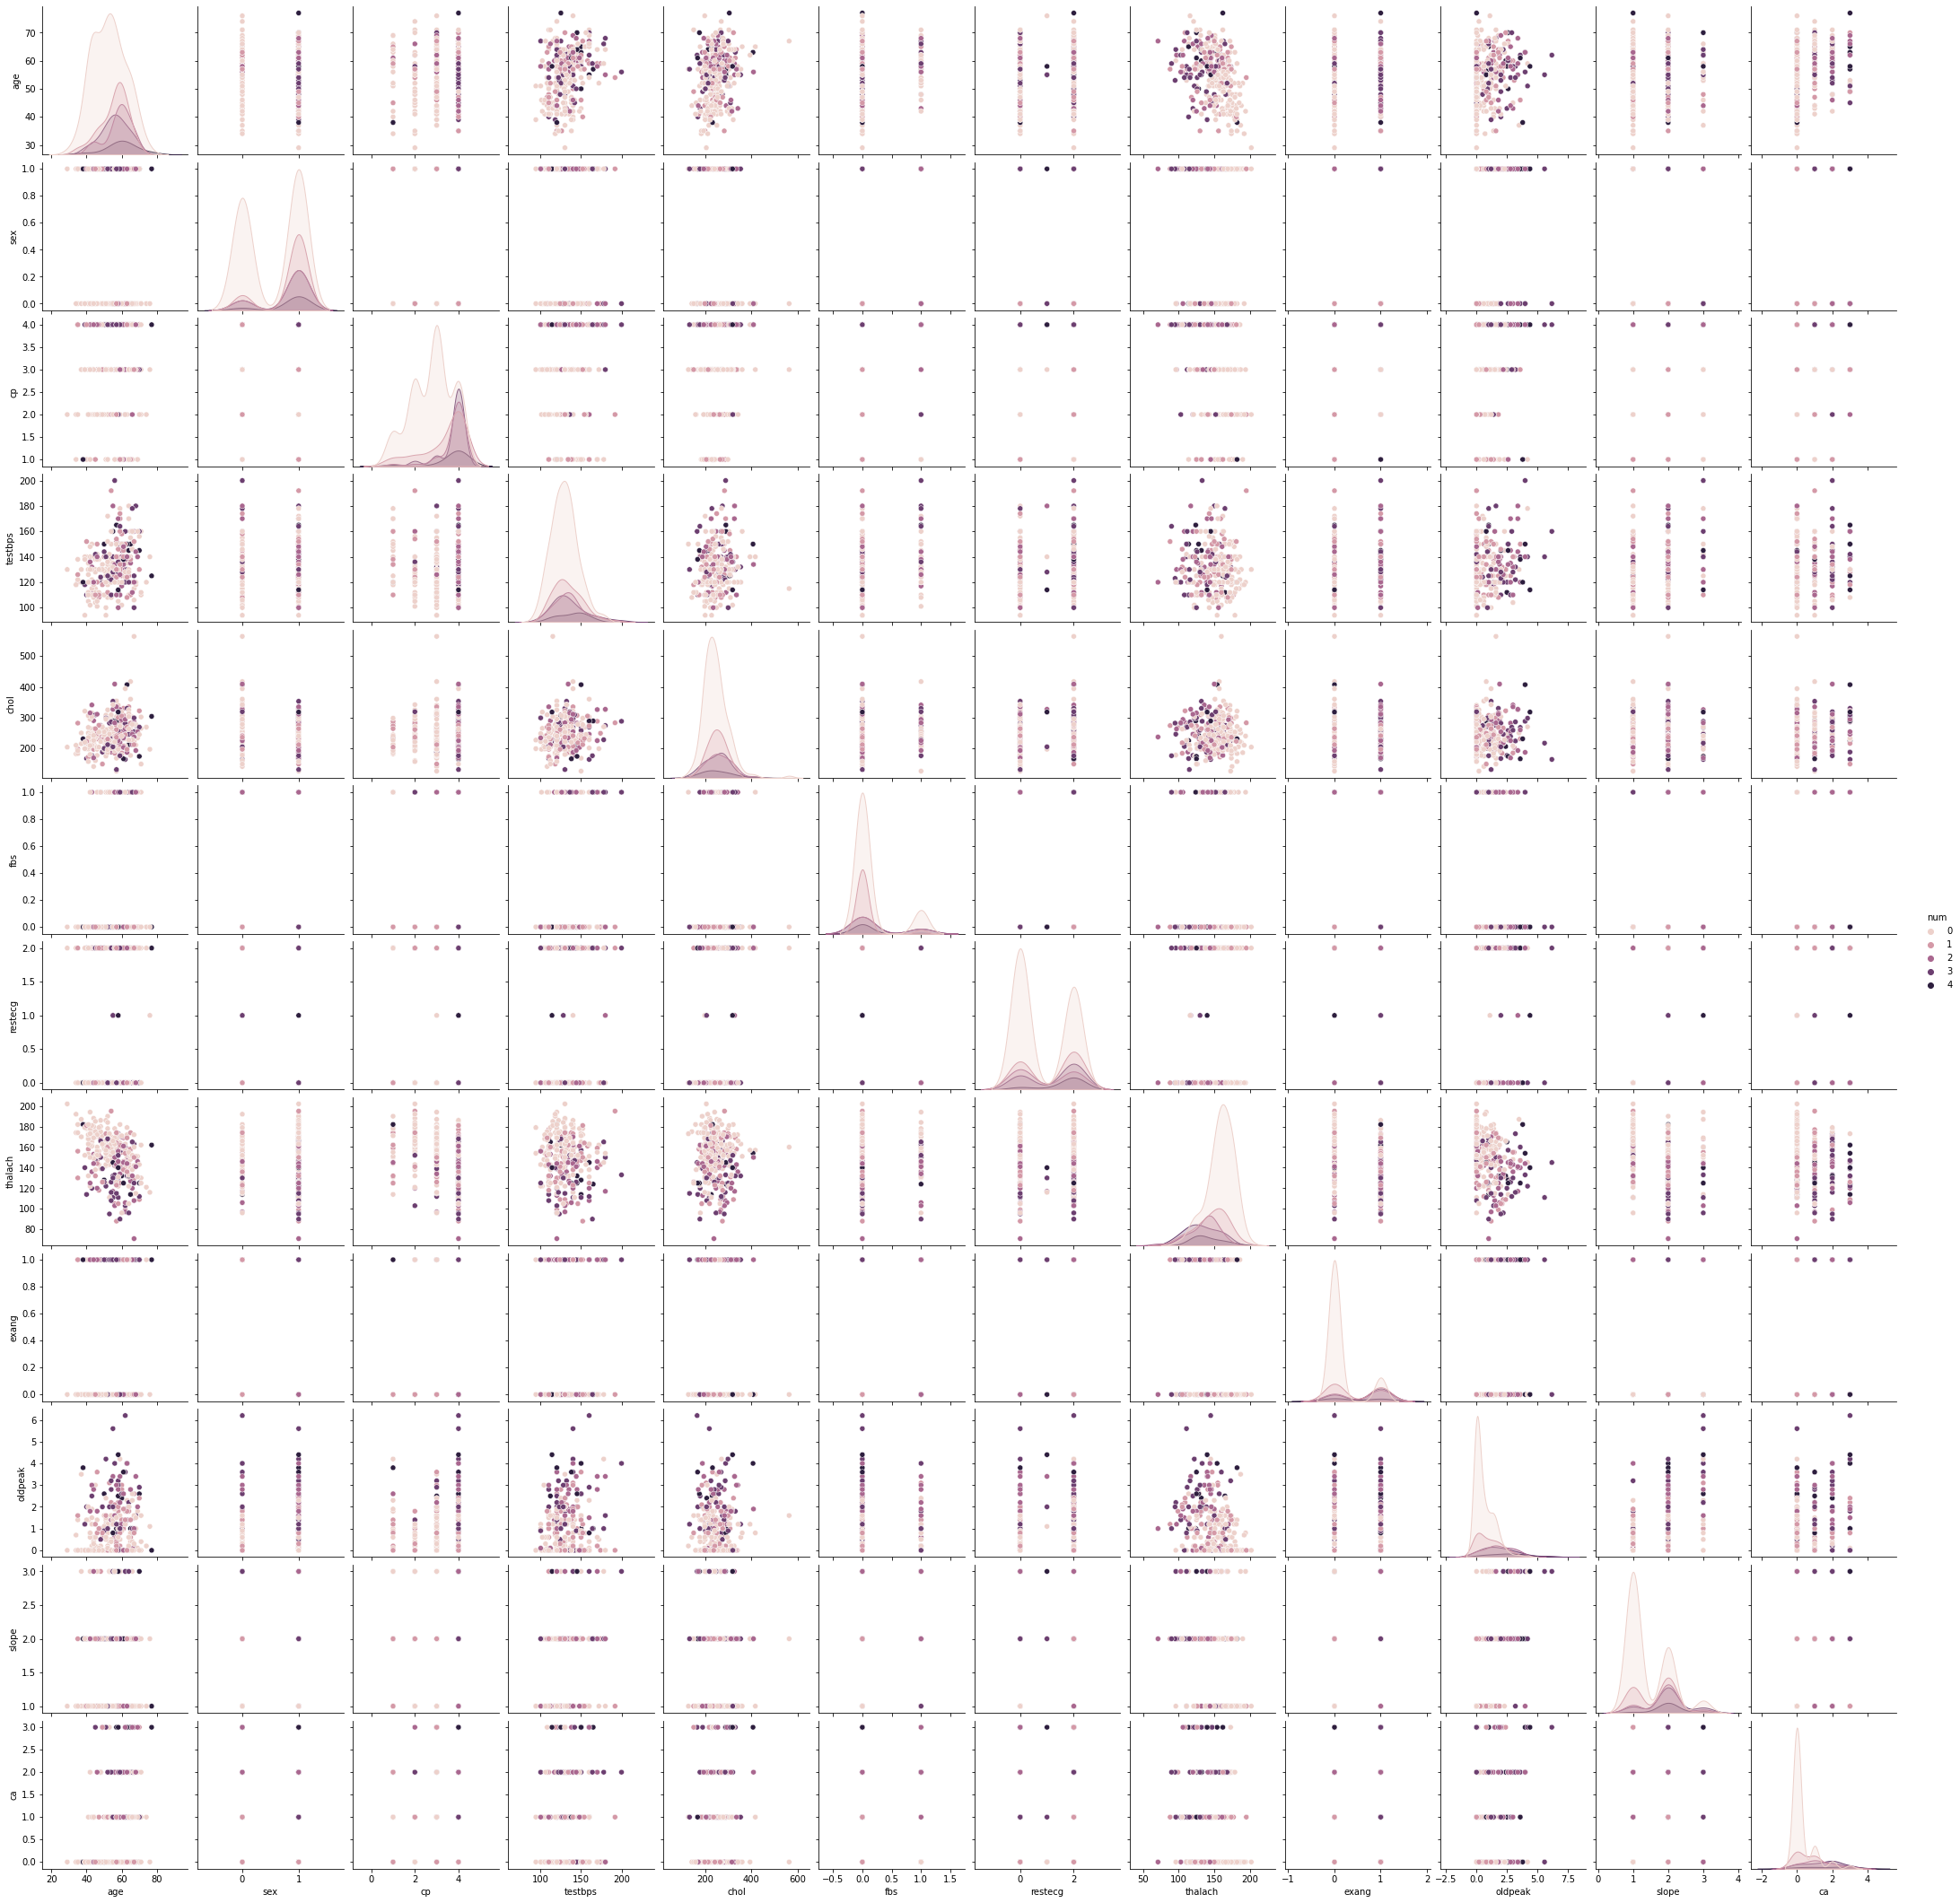

In [21]:
sns.pairplot(cleveland,hue='num')

(-1.0999986683139165,
 1.099999936586377,
 -1.0999969878536957,
 1.0999995243978122)

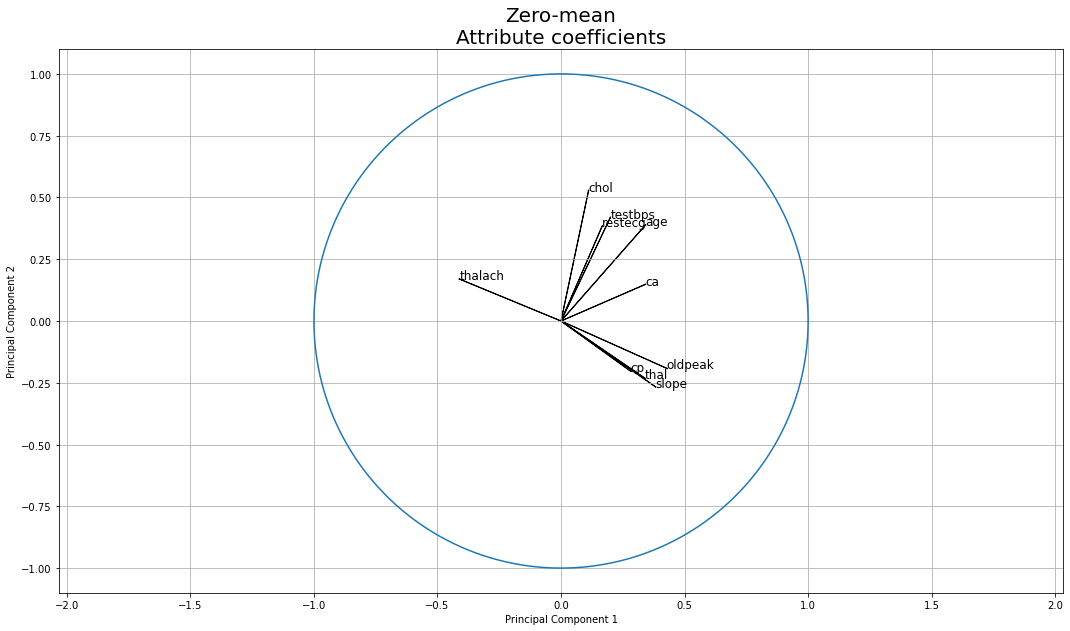

In [22]:
plt.figure(figsize=(18,10))
for pc in range(1):
    for att in range(len(feature_weights[pc])):
        plt.arrow(0,0, feature_weights[pc,att], feature_weights[pc+1,att])
        plt.text(feature_weights[pc,att], feature_weights[pc+1,att], X.columns[att], fontsize=12)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(visible=True)
    # Add a unit circle
plt.plot(np.cos(np.arange(0, 2*np.pi, 0.01)), 
         np.sin(np.arange(0, 2*np.pi, 0.01)));
plt.title('Zero-mean' +'\n'+'Attribute coefficients', fontsize=20)
plt.axis('equal')

#### Clases

In [23]:
import numpy as np
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [24]:
class Arrow3D(FancyArrowPatch):

    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)
        
    def do_3d_projection(self, renderer=None):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))

        return np.min(zs) 

In [25]:
def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)


setattr(Axes3D, 'arrow3D', _arrow3D)

In [26]:
from matplotlib.text import Annotation

class Annotation3D(Annotation):

    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)

In [27]:
def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D, 'annotate3D', _annotate3D)

#### Plot

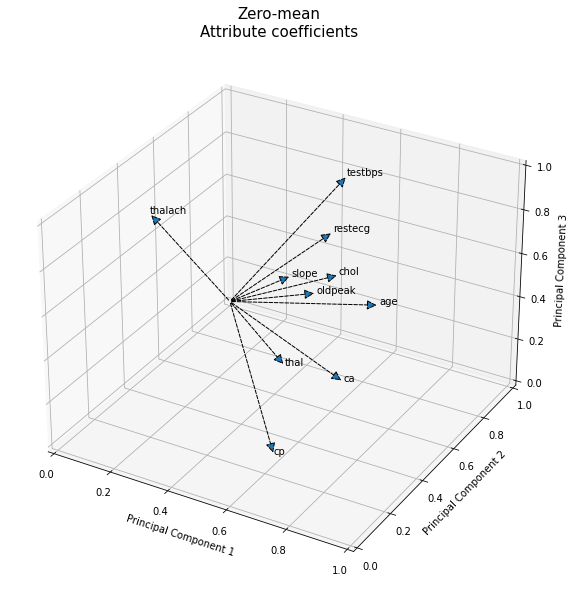

In [28]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, projection='3d')

pc=0
X_ax = []
Y_ax = []
Z_ax = []
for att in range(len(feature_weights[pc])):
    ax.arrow3D(0,1,0,
       feature_weights[pc,att],feature_weights[pc+1,att],feature_weights[pc+2,att],
       mutation_scale=20,
    #    ec='mediumspringgreen',
       arrowstyle="-|>",
       linestyle='dashed')
    ax.annotate3D(X.columns[att], (feature_weights[pc,att],feature_weights[pc+1,att]+1,feature_weights[pc+2,att]), xytext=(feature_weights[pc,att],feature_weights[pc+1,att]), textcoords='offset points')       
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Zero-mean' +'\n'+'Attribute coefficients', fontsize=15)
plt.show()

In [29]:
cleveland.dtypes

age           int32
sex         float64
cp          float64
testbps     float64
chol        float64
fbs         float64
restecg       int32
thalach       int32
exang       float64
oldpeak     float64
slope         int32
ca          float64
thal       category
num           int64
dtype: object

In [30]:
# X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
principal_ca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print(pca.components_)
principalDf = pd.DataFrame(data = principal_ca
             , columns = ['principal component 1', 'principal component 2'])

[0.74635679 0.1498019 ]
[[ 3.71368331e-02  1.33753171e-03  5.13054063e-02  9.97981424e-01
   3.21101747e-03 -1.92049913e-03  9.71790882e-04 -6.72720929e-05
   2.16016819e-03  5.33259394e-04]
 [ 1.81692038e-01  1.36054717e-02  1.15434743e-01 -1.46585623e-02
   3.75407519e-03 -9.75756978e-01  1.82336611e-02  1.05191599e-02
   1.16488768e-02  2.38380427e-02]]


In [31]:
pca_df = pd.concat([principalDf, y], axis=1)
pca_df.rename(columns={'num':'target'}, inplace=True)

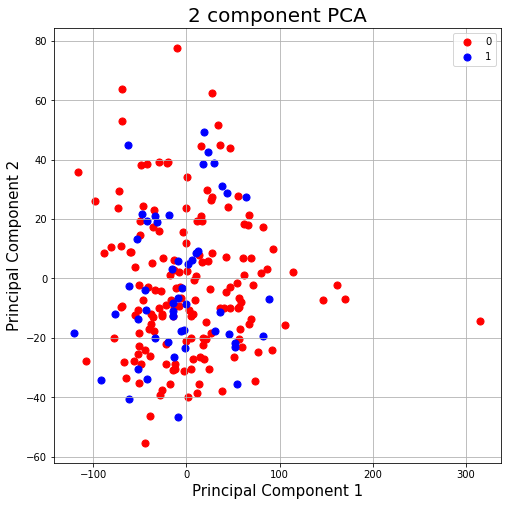

In [32]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pca_df['target'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'principal component 1']
               , pca_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Linear Regression

### Standarization

In [33]:
cleveland.num = [0 if x ==0 else 1 for x in cleveland.num]

In [34]:
clf = StandardScaler()
y = cleveland.num
X = cleveland.drop('num', axis=1)
X['thal'] = X.thal.astype(float)
K = 10
# X = clf.fit_transform(X)

In [35]:
X_scaled = (X - X.mean()) / (X.max() - X.min())
print(f'The standard deviation is \n{X_scaled.max() - X_scaled.min()}')
print(f'The mean is \n{X_scaled.mean()}')

The standard deviation is 
age        1.0
sex        1.0
cp         1.0
testbps    1.0
chol       1.0
fbs        1.0
restecg    1.0
thalach    1.0
exang      1.0
oldpeak    1.0
slope      1.0
ca         1.0
thal       1.0
dtype: float64
The mean is 
age       -2.691450e-17
sex       -4.186700e-17
cp        -7.476249e-18
testbps    7.850062e-17
chol      -2.055969e-17
fbs       -1.794300e-17
restecg    2.990500e-17
thalach    8.672449e-17
exang      2.093350e-17
oldpeak   -4.485750e-18
slope     -2.691450e-17
ca        -8.971499e-18
thal      -7.476249e-17
dtype: float64


In [36]:
X_scaled = clf.fit_transform(X_scaled)
X_scaled

array([[ 0.93618065,  0.69109474, -2.24062879, ...,  2.26414539,
        -0.72197605,  0.65587737],
       [ 1.3789285 ,  0.69109474,  0.87388018, ...,  0.6437811 ,
         2.47842525, -0.89422007],
       [ 1.3789285 ,  0.69109474,  0.87388018, ...,  0.6437811 ,
         1.41162482,  1.17257652],
       ...,
       [ 1.48961547,  0.69109474,  0.87388018, ...,  0.6437811 ,
         1.41162482,  1.17257652],
       [ 0.27205887,  0.69109474,  0.87388018, ...,  0.6437811 ,
         0.34482438,  1.17257652],
       [ 0.27205887, -1.44697961, -1.20245913, ...,  0.6437811 ,
         0.34482438, -0.89422007]])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33)

In [38]:
y_train = np.array(y_train)

In [39]:
lambdas = np.power(10.,range(-5,9))
opt_val_err, opt_lambda, mean_w_vs_lambda, train_err_vs_lambda, test_err_vs_lambda = rlr_validate(X_train, y_train, lambdas)

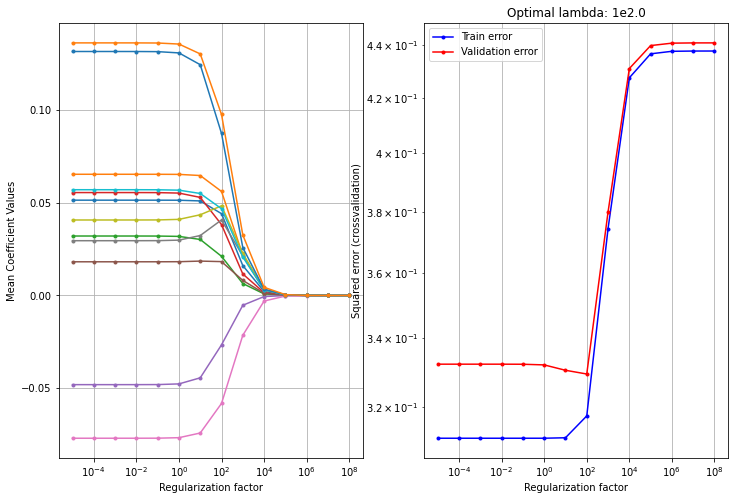

In [40]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.semilogx(lambdas,mean_w_vs_lambda.T[:,1:],'.-') # Don't plot the bias term
plt.xlabel('Regularization factor')
plt.ylabel('Mean Coefficient Values')
plt.grid()
# You can choose to display the legend, but it's omitted for a cleaner 
# plot, since there are many attributes
#legend(attributeNames[1:], loc='best')

plt.subplot(1,2,2)
plt.title('Optimal lambda: 1e{0}'.format(np.log10(opt_lambda)))
plt.loglog(lambdas,train_err_vs_lambda.T,'b.-',lambdas,test_err_vs_lambda.T,'r.-')
plt.xlabel('Regularization factor')
plt.ylabel('Squared error (crossvalidation)')
plt.legend(['Train error','Validation error'])
plt.grid()

# To inspect the used indices, use these print statements
#print('Cross validation fold {0}/{1}:'.format(k+1,K))
#print('Train indices: {0}'.format(train_index))
#print('Test indices: {0}/n'.format(test_index))

plt.show()

In [41]:
M = X_train.shape[1]
Error_test_rlr = np.empty((len(X_test),1))
Error_train_rlr = np.empty((len(X_train),1))
w_rlr = np.empty((M,K))

Xty = X_train.T @ y_train
XtX = X_train.T @ X_train

lambdaI = opt_lambda * np.eye(M)
lambdaI[0,0] = 0 
w_rlr[:,1] = np.linalg.solve(XtX+lambdaI,Xty).squeeze()
# Compute mean squared error with regularization with optimal lambda
Error_train_rlr[1] = np.square(y_train-X_train @ w_rlr[:,1]).sum(axis=0)/y_train.shape[0]
Error_test_rlr[1] = np.square(y_test-X_test @ w_rlr[:,1]).sum(axis=0)/y_test.shape[0]

In [42]:
lambda_interval = np.linspace(-8, 2, 50)
lambda_interval = np.logspace(-8, 2, 50)

Error_train_sm = np.empty((len(X_train),1))
Error_test_sm = np.empty((len(X_test),1))

train_error_rate = np.zeros(len(lambda_interval))
test_error_rate = np.zeros(len(lambda_interval))
coefficient_norm = np.zeros(len(lambda_interval))
for k in range(0, len(lambda_interval)):
    mdl = LinearRegression()
    # mdl = LogisticRegression(penalty='l2', C=1/opt_lambda)
    
    mdl.fit(X_train, y_train)

    y_train_est = mdl.predict(X_train).T
    y_test_est = mdl.predict(X_test).T

    Error_train_sm[k] = np.square(y_train-mdl.predict(X_train)).sum()/y_train.shape[0]
    Error_test_sm[k] = np.square(y_test-mdl.predict(X_test)).sum()/y_test.shape[0]
    
    train_error_rate[k] = np.sum(y_train_est != y_train) / len(y_train)
    test_error_rate[k] = np.sum(y_test_est != y_test) / len(y_test)

    w_est = mdl.coef_[0] 
    coefficient_norm[k] = np.sqrt(np.sum(w_est**2))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

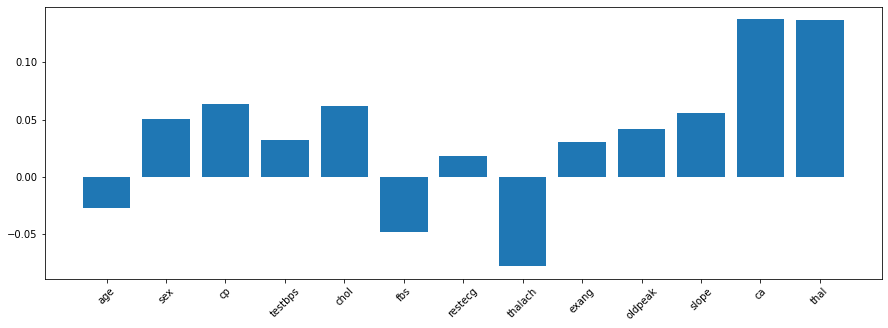

In [43]:
# plt.bar(np.arange(13),mdl.coef_)
plt.figure(figsize=(15,5))
# sns.heatmap(cleveland.corr()[12:13], annot=True)
plt.bar(X.columns,mdl.coef_)
plt.xticks(rotation=45)

<AxesSubplot:>

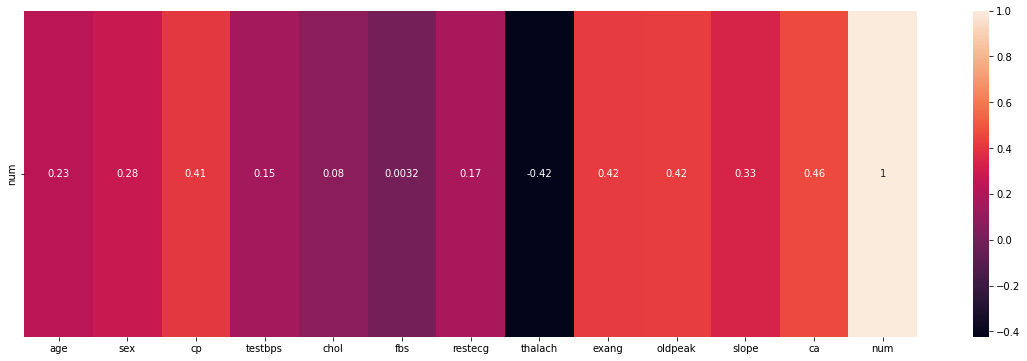

In [57]:
plt.figure(figsize=(20,6))
sns.heatmap(cleveland.corr()[12:13], annot=True)

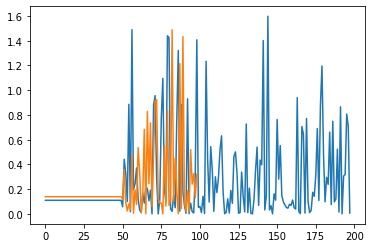

In [44]:
plt.plot(Error_train_sm)
plt.plot(Error_test_sm)

In [45]:
print(f'The training MSE is {Error_train_sm.mean()}')
print(f'The test MSE is {Error_test_sm.mean()}')

The training MSE is 0.26993465672062766
The test MSE is 0.23218324545459793


In [46]:
mdl.score(X_test, y_test)

0.44298576236785214

### ANN

Training model of type:
Sequential(
  (0): Linear(in_features=13, out_features=15, bias=True)
  (1): ReLU()
  (2): Linear(in_features=15, out_features=30, bias=True)
  (3): ReLU()
  (4): Linear(in_features=30, out_features=45, bias=True)
  (5): ReLU()
  (6): Linear(in_features=45, out_features=1, bias=True)
  (7): Sigmoid()
)


Crossvalidation fold: 1/4

	Replicate: 1/3
		Iter	Loss			Rel. loss
		1000	0.00017884558	0.0023798058
		2000	3.5205132e-05	0.0012190208
		3000	1.2649095e-05	0.0008907183
		4000	5.6322115e-06	0.00057171914
		5000	2.7874833e-06	0.00057758624
		Final loss:
		5198	2.4448848e-06	0.0

	Replicate: 2/3
		Iter	Loss			Rel. loss
		1000	0.00019014903	0.002483763
		2000	3.571415e-05	0.0012841754
		3000	1.2695776e-05	0.0009086128
		4000	5.6458975e-06	0.000570334
		5000	2.779696e-06	0.0004827025
		Final loss:
		5182	2.4623357e-06	0.0

	Replicate: 3/3
		Iter	Loss			Rel. loss
		1000	0.00018229858	0.0023807553
		2000	3.477164e-05	0.0012186484
		3000	1.2030305e-05	0.0010478551
		40

<Figure size 720x720 with 0 Axes>

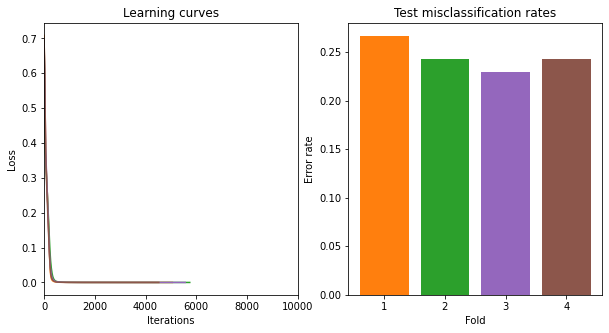

Diagram of best neural net in last fold:

Generalization error/average error rate: 24.5721%


In [104]:
from sklearn.model_selection import KFold
import torch
K = 4
CV = KFold(K,shuffle=True)

X = X_scaled
# y = y.to_numpy()

# Setup figure for display of the decision boundary for the several crossvalidation folds.
decision_boundaries = plt.figure(1, figsize=(10,10))
# Determine a size of a plot grid that fits visualizations for the chosen number
# of cross-validation splits, if K=4, this is simply a 2-by-2 grid.
subplot_size_1 = int(np.floor(np.sqrt(K))) 
subplot_size_2 = int(np.ceil(K/subplot_size_1))
# Set overall title for all of the subplots
plt.suptitle('Data and model decision boundaries', fontsize=20)
# Change spacing of subplots
plt.subplots_adjust(left=0, bottom=0, right=1, top=.9, wspace=.5, hspace=0.25)

# Setup figure for display of learning curves and error rates in fold
summaries, summaries_axes = plt.subplots(1, 2, figsize=(10,5))
# Make a list for storing assigned color of learning curve for up to K=10
color_list = ['tab:orange', 'tab:green', 'tab:purple', 'tab:brown', 'tab:pink',
              'tab:gray', 'tab:olive', 'tab:cyan', 'tab:red', 'tab:blue']

# Define the model structure
n_hidden_units = 15 # number of hidden units in the signle hidden layer
# The lambda-syntax defines an anonymous function, which is used here to 
# make it easy to make new networks within each cross validation fold
model = lambda: torch.nn.Sequential(
                    torch.nn.Linear(M, n_hidden_units), #M features to H hiden units
                    # 1st transfer function, either Tanh or ReLU:
                    torch.nn.ReLU(),     
                    torch.nn.Linear(n_hidden_units, n_hidden_units*2),
                    torch.nn.ReLU(),
                    torch.nn.Linear(n_hidden_units*2, n_hidden_units*3),
                    torch.nn.ReLU(),
                    torch.nn.Linear(n_hidden_units*3, 1), # H hidden units to 1 output neuron
                    torch.nn.Sigmoid() # final tranfer function
                    )
# Since we're training a neural network for binary classification, we use a 
# binary cross entropy loss (see the help(train_neural_net) for more on
# the loss_fn input to the function)
loss_fn = torch.nn.BCELoss()
# Train for a maximum of 10000 steps, or until convergence (see help for the 
# function train_neural_net() for more on the tolerance/convergence))
max_iter = 10000
print('Training model of type:\n{}\n'.format(str(model())))

# Do cross-validation:
errors = [] # make a list for storing generalizaition error in each loop
# Loop over each cross-validation split. The CV.split-method returns the 
# indices to be used for training and testing in each split, and calling 
# the enumerate-method with this simply returns this indices along with 
# a counter k:
for k, (train_index, test_index) in enumerate(CV.split(X,y)): 
    print('\nCrossvalidation fold: {0}/{1}'.format(k+1,K))    
    
    # Extract training and test set for current CV fold, 
    # and convert them to PyTorch tensors
    X_train = torch.Tensor(X[train_index,:] )
    y_train = torch.Tensor(y[train_index] )
    X_test = torch.Tensor(X[test_index,:] )
    y_test = torch.Tensor(y[test_index] )
    
    y_train = y_train.reshape(y_train.shape[0],1)
    y_test = y_test.reshape(y_test.shape[0],1)

    net, final_loss, learning_curve = train_neural_net(model,
                                                       loss_fn,
                                                       X=X_train,
                                                       y=y_train,
                                                       n_replicates=3,
                                                       max_iter=max_iter)
    
    print('\n\tBest loss: {}\n'.format(final_loss))
    
    # Determine estimated class labels for test set
    y_sigmoid = net(X_test) # activation of final note, i.e. prediction of network
    y_test_est = (y_sigmoid > .5).type(dtype=torch.uint8) # threshold output of sigmoidal function
    y_test = y_test.type(dtype=torch.uint8)
    # Determine errors and error rate
    e = (y_test_est != y_test)
    error_rate = (sum(e).type(torch.float)/len(y_test)).data.numpy()
    errors.append(error_rate) # store error rate for current CV fold 
    h, = summaries_axes[0].plot(learning_curve, color=color_list[k])
    h.set_label('CV fold {0}'.format(k+1))
    summaries_axes[0].set_xlabel('Iterations')
    summaries_axes[0].set_xlim((0, max_iter))
    summaries_axes[0].set_ylabel('Loss')
    summaries_axes[0].set_title('Learning curves')
    
# Display the error rate across folds
summaries_axes[1].bar(np.arange(1, K+1), np.squeeze(np.asarray(errors)), color=color_list)
summaries_axes[1].set_xlabel('Fold');
summaries_axes[1].set_xticks(np.arange(1, K+1))
summaries_axes[1].set_ylabel('Error rate');
summaries_axes[1].set_title('Test misclassification rates')
    
# Show the plots
plt.show(decision_boundaries.number) # try these lines if the following code fails (depends on package versions)
plt.show(summaries.number)
plt.show()

# Display a diagram of the best network in last fold
print('Diagram of best neural net in last fold:')
weights = [net[i].weight.data.numpy().T for i in [0,2]]
biases = [net[i].bias.data.numpy() for i in [0,2]]
tf =  [str(net[i]) for i in [1,3]]
# draw_neural_net(weights, biases, tf)

# Print the average classification error rate
print('\nGeneralization error/average error rate: {0}%'.format(round(100*np.mean(errors),4)))

6: Generalization error/average error rate: 23.9099%
8: Generalization error/average error rate: 22.9009%
15: Generalization error/average error rate: 22.8649%
50: Generalization error/average error rate: 22.9099%
120: Generalization error/average error rate: 23.2162%

### Model

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.5259942169948442

In [ ]:
reg.coef_

array([-0.01823632,  0.11402121,  0.01226268, -0.01500537,  0.04798663,
       -0.06210558,  0.02865296,  0.05363884,  0.15252061,  0.14238867])

In [ ]:
reg.intercept_

-0.0938868586025618

In [ ]:
y_pred = reg.predict(X_test)
print('MAE: {:1.8f}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE: {:1.8f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE: {:1.8f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

MAE: 0.27067260
MSE: 0.11790900
RMSE: 0.34337880


c:\Users\guzma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [ ]:
import numpy as np

def jaccard_binary(x,y):
    """A function for finding the similarity between two binary vectors"""
    intersection = np.logical_and(x, y)
    union = np.logical_or(x, y)
    similarity = intersection.sum() / float(union.sum())
    return similarity

# Define some binary vectors
x = [1,1,1,1,1,1,1,1,0,0,0,0,0]
y = [1,0,0,1,0,0,0,0,1,1,1,1,1]

# Find similarity among the vectors
simxy = jaccard_binary(x,y)

print(' Similarity between x and y is', simxy)

 Similarity between x and y is 0.15384615384615385
